## **MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM** 
## **PROFA. ROSELI AP. FRANCELIN ROMERO** 
#-------------------------------------------------
#**PRINCIPAL COMPONENT ANALYSIS** - **PCA**
# **OBJETIVO:**
##### - **REDUÇÃO DA DIMENSIONALIDADE DOS DADOS**
##### - **DIMINUIR O NUMERO DE ATRIBUTOS COM A MENOR PERDA DE INFORMAÇÃO ACEITÁVEL**
## - **COMPONENTES PRINCIPAIS SÃO EIXOS ORTOGONAIS** 
##### -  **POSICIONA OS EIXOS PRINCIPAIS NA DIREÇÃO DE MAIOR VARIÂNCIA**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

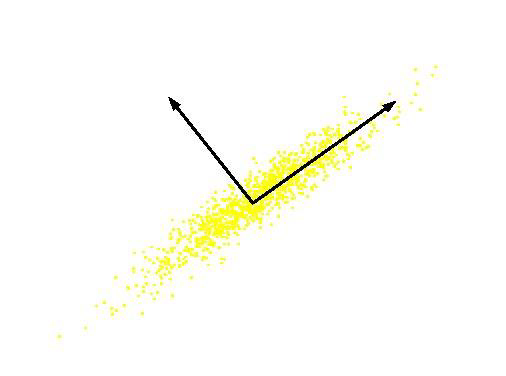

In [ ]:
imagem = cv2.imread('/content/figura1.png')
cv2_imshow(imagem)


# **OBSERVAÇÃO**:
# - PCA NÃO É UM CLASSIFICADOR
# - TENTAR MANTER A VARIANCIA ACIMA DE 90%
# - LEMBRAR QUE SEMPRE HÁ PERDA DE INFORMAÇÃO
# - NÃO HÁ UM NUMERO ÓTIMO DE ATRIBUTOS
# - OS ATRIBUTOS DEVEM SER **PADRONIZADOS**


In [ ]:
from sklearn.datasets import load_iris 
import pandas as pd

In [ ]:
raw_data = load_iris()
print(raw_data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# Criando um DataFrame a partir de raw_data
df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
# Adicionando uma coluna com as classes
class_names = raw_data["target_names"]
classes = [class_names[i] for i in raw_data["target"]]
df["class"] = classes
 

In [ ]:
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#**PCA:**
# Permite uma mudança de espaço com algumas propriedades nem sempre encontradas nos dados originais. Vejam temos 4 atributos e queremos analisar todos estes atributos juntos. Grafico 4 dimensões.
#Eixos Principais (novas variáves não correlacionadas)
Numero de eixos = numero de variáveis.
 
Normalmente, usamos 2 variáveis (para facilitar a visualização)

## **PADRONIZAR OS DADOS**
# PRIMEIRO OS DADOS PRECISAM SER PADRONIZADOS: MEDIA = 0; VARIANCIA = 1

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

In [ ]:
df.info()
vet1 = df['sepal length (cm)']
med1 =np.mean(vet1)
print(med1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
5.843333333333334


In [ ]:
pca = PCA()
# Sem o label
pca.fit_transform(scaler.fit_transform(df.drop(columns="class")))
 


array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [ ]:
print("As %d componentes principais explicam %.2f%% da variancia dos dados originais" % (len(pca.components_), pca.explained_variance_ratio_.sum() * 100))
component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

As 4 componentes principais explicam 100.00% da variancia dos dados originais


#Imprimindo os auto-vetores apenas para ver que o primeiro é o maior deles.
# Eles são considerados em ordem decrescente.

In [ ]:
#auto-vetores
print(pca.singular_values_) 

[20.92306556 11.7091661   4.69185798  1.76273239]


#Exibindo o histograma dos auto-vetores.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


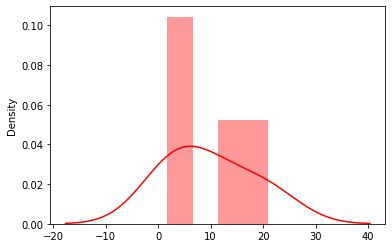

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(pca.singular_values_, bins=4, color="red")

# Exibindo o histograma dos auto-vetores. Eles aparecem em ordem decrescente.

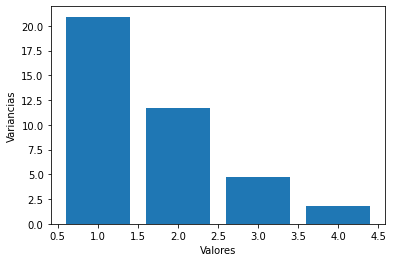

In [ ]:
from matplotlib import pyplot as plt
plt.ylabel('Variancias')
plt.xlabel('Valores')
X = [ 1,2,3,4]
Y = pca.singular_values_
plt.bar(X, Y)
plt.show()

#**E se quisermos saber quanto cada componente preserva da variancia?**
#Ai tem a função: ratio

In [ ]:
print(pca.explained_variance_ratio_)

for i, ratio in enumerate(pca.explained_variance_ratio_):
  print(f"Z{i+1} é responsável por {ratio*100} da variância total")

[0.72962445 0.22850762 0.03668922 0.00517871]
Z1 é responsável por 72.96244541329987 da variância total
Z2 é responsável por 22.850761786701778 da variância total
Z3 é responsável por 3.6689218892828763 da variância total
Z4 é responsável por 0.5178709107154797 da variância total


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
pca = PCA(2)

In [ ]:
pca_values = pca.fit_transform(scaler.fit_transform(df.drop(columns="class").values))

# Vamos plotar o grafico das componentes principais: Z1 x Z2.
# Nota-se como as classes estão separadas.

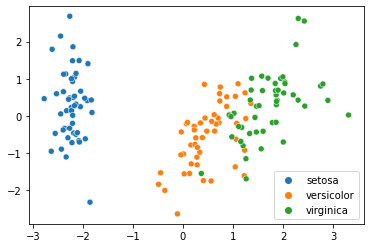

In [ ]:
sns.scatterplot(x=pca_values[:, 0], y=pca_values[:, 1], hue=classes)